In [25]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

### Data Load and see features

In [26]:
data = pd.read_csv('bengaluru_house_prices.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [27]:
data.shape

(13320, 9)

In [28]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [29]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [30]:
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [31]:
data['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [32]:
data.drop(['area_type', 'society', 'balcony', 'availability'], axis = 'columns', inplace = True)
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# Data Cleaning

In [33]:
data.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [34]:
data.isna().sum() ## isnull and isna are alias but prefer isna over isnull

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [35]:
data.dropna(inplace = True)

In [36]:
data.shape


(13246, 5)

### Feature Engineering

In [37]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [38]:
 data['bedrooms'] = data['size'].apply(lambda x: int(x.split(' ')[0]))

In [39]:
data.bedrooms.head(10)

0    2
1    4
2    3
3    3
4    2
5    2
6    4
7    4
8    3
9    6
Name: bedrooms, dtype: int64

In [40]:
data.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [48]:
def is_float(x):
    try:
        float(x)
    except:
        return False 
    return True
    

In [49]:
data[~data['total_sqft'].apply(is_float)].head(15)

,location,size,total_sqft,bath,price,bedrooms
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [43]:
def rang_to_num(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0]) + float(token[1]))/2
    try:
        return float(x)
    except:
        return None


In [4]:
rang_to_num('34.46Sq. Meter')


In [5]:
rang_to_num('2100 - 2850')

2475.0

In [67]:
rang_to_num('12342')

12342.0

In [69]:
data['total_sqft'] = data['total_sqft'].apply(rang_to_num)
data = data[data.total_sqft.notnull()]

In [70]:
data.head()

,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [71]:
data.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bedrooms              4
Name: 30, dtype: object

In [72]:
data[data['total_sqft'] == '1000Sq. Meter']

,location,size,total_sqft,bath,price,bedrooms


In [73]:
data.shape

(13200, 6)

In [74]:
data['total_sqft'].isna().sum()

0

In [75]:
data = data[data.total_sqft.notnull()]

In [76]:
data.shape

(13200, 6)

In [77]:
data['price_per_sqft'] = data['price'] * 100000 / data['total_sqft']

In [78]:
data.head()

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [79]:
len(data.location.unique())

1298

In [80]:
data.location = data.location.apply(lambda x: x.strip())
location_sort = data['location'].value_counts(ascending = False)
location_sort

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [81]:
data.head(20)

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [82]:
len(location_sort[location_sort>10])

240

### Dimentionality Reduction

In [83]:
location_less_freq = location_sort[location_sort <= 10]
location_less_freq

location
BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: count, Length: 1047, dtype: int64

In [84]:
data['location'] = data['location'].apply(lambda x: 'others' if x in location_less_freq else x )


In [85]:
data[data.location == 'others'].count()

location          2872
size              2872
total_sqft        2872
bath              2872
price             2872
bedrooms          2872
price_per_sqft    2872
dtype: int64

In [86]:
data.head()

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [87]:
data[data.total_sqft/data.bedrooms>300].head()

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [88]:
data.shape

(13200, 7)

In [89]:
data = data[~(data.total_sqft/data.bedrooms<300)]

In [90]:
data.shape

(12456, 7)

In [91]:
data.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [92]:
data2 = data

In [93]:
def remove_outliers_pps(df):
    trimmed_df = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        
        mean = np.mean(subdf['price_per_sqft'])
        std = np.std(subdf.price_per_sqft)
        without_outliers = subdf[ (subdf.price_per_sqft > (mean - std)) &  (subdf.price_per_sqft <= (mean + std)) ]
        trimmed_df = pd.concat([trimmed_df, without_outliers], ignore_index = False)
    return trimmed_df
data2 = remove_outliers_pps(data)
data2.shape

(10242, 7)

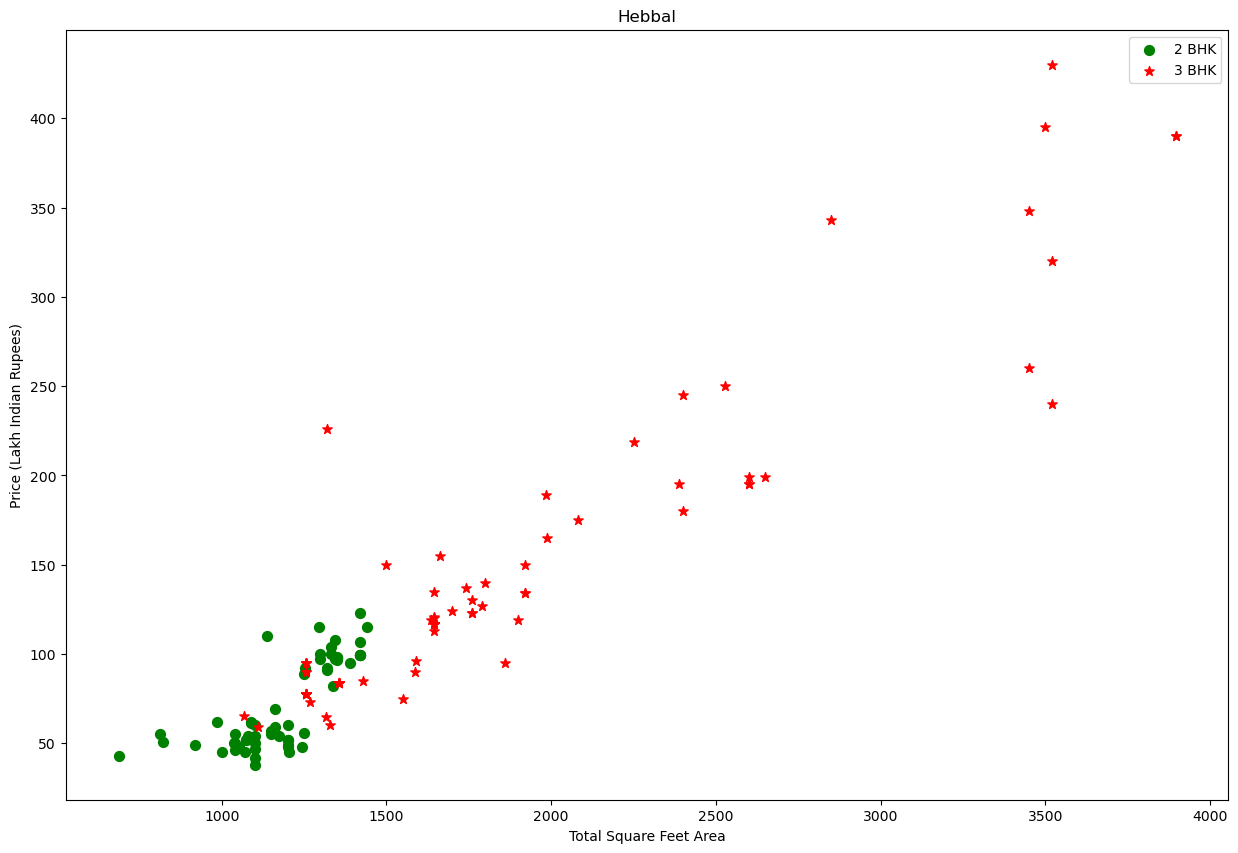

In [99]:
def plot_scatter(df, loc):
    bed2 = df[ (df.location == loc) & (df.bedrooms == 2)]
    bed3 = df[ (df.location == loc) & (df.bedrooms == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bed2.total_sqft,bed2.price,color='green',label='2 BHK', s=50)
    plt.scatter(bed3.total_sqft,bed3.price,marker='*', color='red',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(loc)
    plt.legend()
plot_scatter(data,"Hebbal")

In [120]:

def remove_outliers_bed(df):
    exclude_index = np.array([])
    for location, location_df  in df.groupby('location'):
        bed_stats = {}
        for bed, bed_df in location_df.groupby('bedrooms'):
            bed_stats[bed] = {
                'mean': np.mean(bed_df.price_per_sqft),
                'std': np.std(bed_df.price_per_sqft),
                'count': bed_df.shape[0]
            }
        for bed, bed_df in location_df.groupby('bedrooms'):
            stats = bed_stats.get(bed-1)
            if stats and stats['count'] > 5:
                exclude_index = np.append(exclude_index, bed_df[bed_df.price_per_sqft<(stats['mean'])].index.values)
    
    return df.drop(exclude_index, axis = 'index')
data3 = remove_outliers_bed(data2)
data3.shape


(7317, 7)

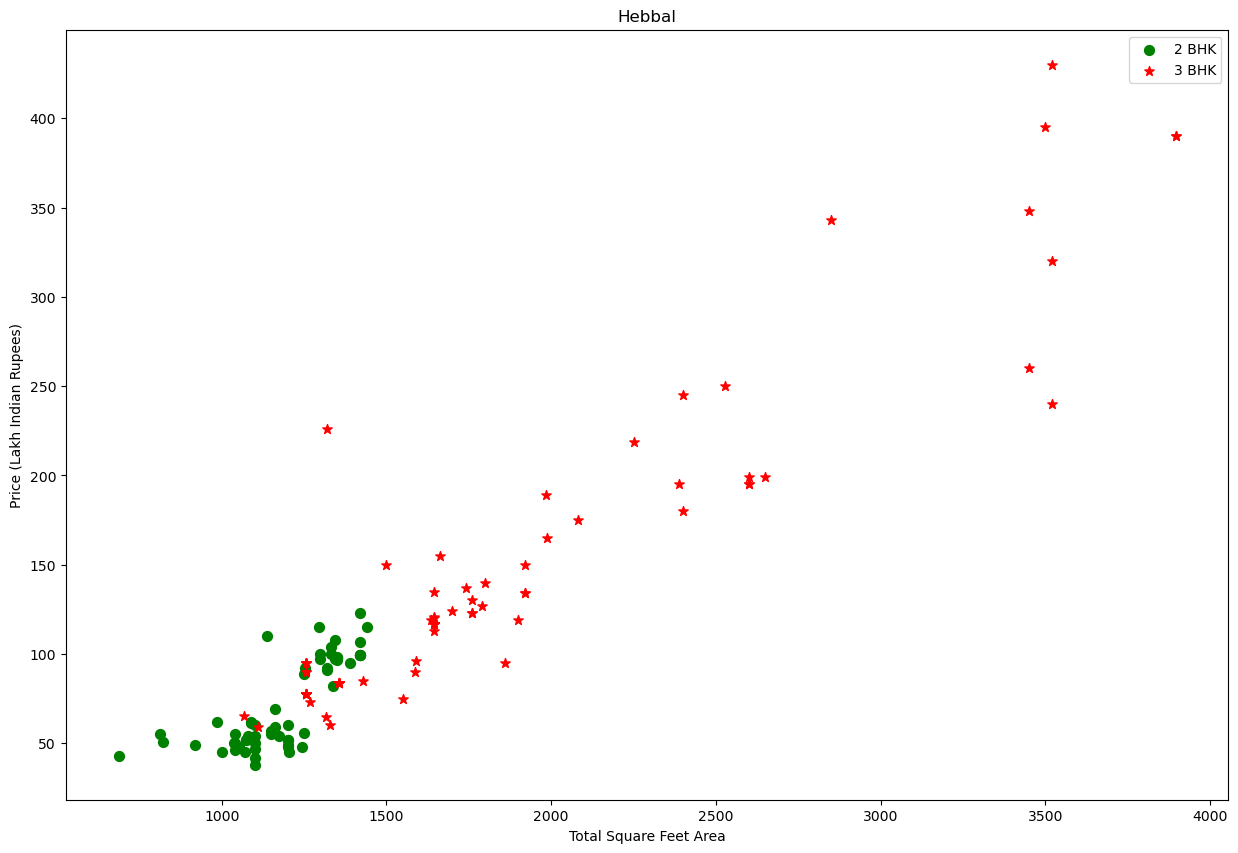

In [121]:
plot_scatter(data,"Hebbal")

Text(0, 0.5, 'Count')

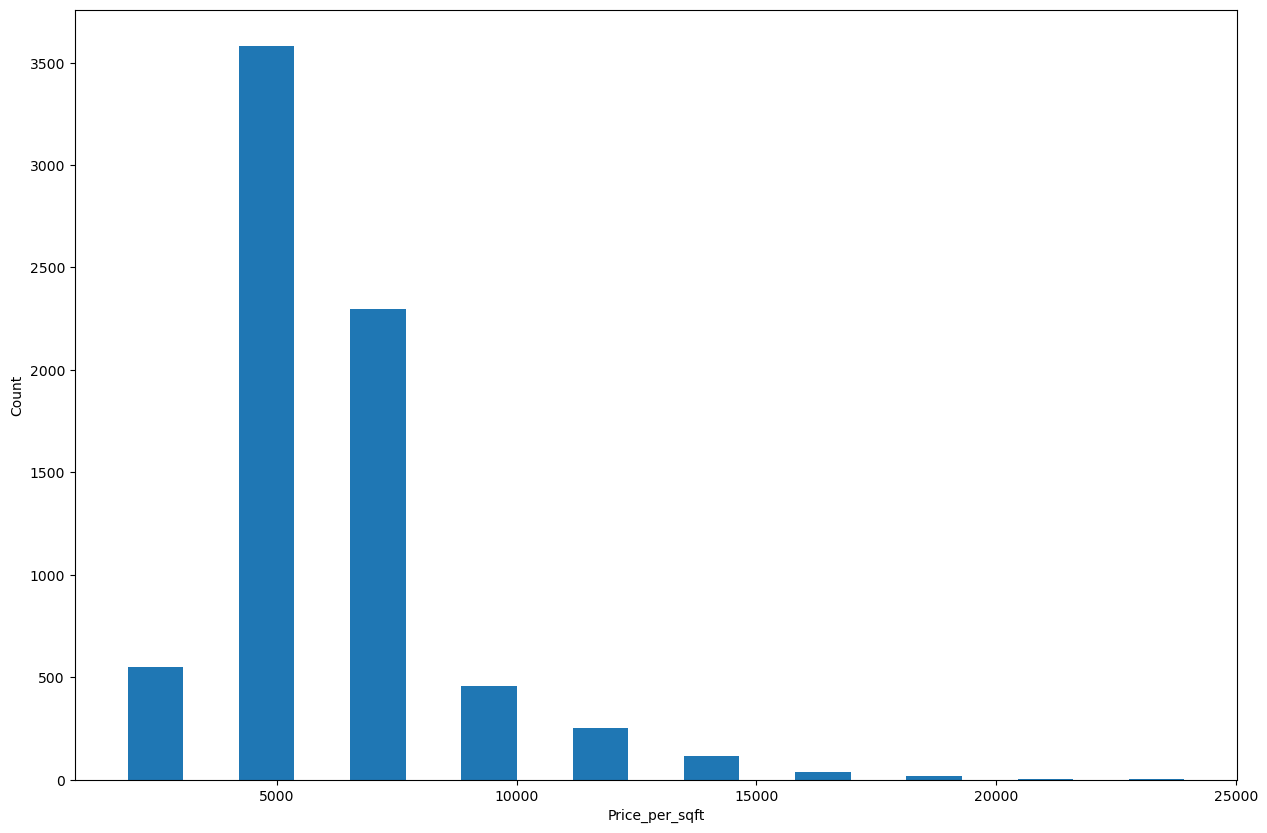

In [122]:
plt.hist(data3.price_per_sqft, rwidth = 0.5)
plt.xlabel('Price_per_sqft')
plt.ylabel('Count')

In [123]:
data3[data3.bath  >= data3.bedrooms + 2]

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
1063,2nd Stage Nagarbhavi,6 Bedroom,3000.0,8.0,451.0,6,15033.333333
1068,2nd Stage Nagarbhavi,6 Bedroom,2400.0,8.0,450.0,6,18750.000000
6836,Arekere,4 BHK,2710.0,6.0,142.0,4,5239.852399
1978,BTM 2nd Stage,3 Bedroom,1260.0,5.0,185.0,3,14682.539683
1881,Bannerghatta,4 BHK,3012.0,6.0,250.0,4,8300.132802
...,...,...,...,...,...,...,...
11441,others,4 BHK,6652.0,6.0,510.0,4,7666.867108
12075,others,2 BHK,600.0,4.0,70.0,2,11666.666667
12366,others,3 Bedroom,5656.0,5.0,499.0,3,8822.489392
13095,others,4 BHK,6652.0,6.0,660.0,4,9921.828022


In [129]:
data4 = data3[data3.bath < data3.bedrooms + 2]

In [130]:
data4.shape

(7239, 7)

In [369]:
data5 = data4.drop(['size', 'price_per_sqft'], axis = 'columns')
data5.shape

(7239, 5)

In [370]:
dummies = pd.get_dummies(data5.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
210,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
848,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2152,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [371]:
data6 = pd.concat([data5, dummies], axis = 'columns')
data6.head()
data6.shape

(7239, 246)

In [373]:
data7 = data6.drop( ['location', 'others'], axis = 'columns')
data7.shape

(7239, 244)

In [374]:
inputs = data7.drop('price', axis = 'columns')
target = data7.price

In [376]:
inputs.head()

,total_sqft,bath,bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
848,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2152,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7138,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7358,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [377]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, = train_test_split(inputs, target, test_size=0.2, random_state=1)

In [378]:
len(x_train)

5791

In [379]:
len(y_train)

5791

In [380]:
len(x_test)

1448

In [381]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)


LinearRegression()

In [382]:
lr_model.score(x_test, y_test)

0.8655871771675845

In [383]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state= 0)
scores = cross_val_score(LinearRegression(), x_train, y_train, cv = cv)

In [384]:
scores

array([0.83814513, 0.78512211, 0.846461  , 0.78667514, 0.87372025])

In [385]:
scores.mean()

0.8260247258875099

In [386]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm

def find_best_model_using_gridsearchcv(x_train, y_train):
    algo_list =  {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }


    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)

    for algo_name, config in algo_list.items():
        gscv =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gscv.fit(x_train, y_train)
        scores.append({
                'model': algo_name,
                'best_score': gscv.best_score_,
                'best_params': gscv.best_params_
            })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
    

find_best_model_using_gridsearchcv(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 

,model,best_score,best_params
0,linear_regression,0.781220,{}
1,lasso,0.688591,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.627960,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [388]:
scores

array([0.83814513, 0.78512211, 0.846461  , 0.78667514, 0.87372025])

In [389]:
x_train.columns
         

Index(['total_sqft', 'bath', 'bedrooms', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [390]:
np.where(inputs.columns=='2nd Phase Judicial Layout')[0][0]

5

In [391]:
inputs.head()

,total_sqft,bath,bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
848,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2152,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7138,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7358,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [393]:
np.where(inputs.columns == 'Indira Nagar')[0][0]

116

In [394]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(inputs.columns==location)[0][0]

    x = np.zeros(len(inputs.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_model.predict([x])[0]

In [399]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.24836395379081

In [400]:
predict_price('Indira Nagar',1000, 2, 2)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


176.61342940724109

## Save the trained model in pickle file

In [402]:
import pickle
with open('real_state_predictor(pickle)', 'wb') as f:
       pickle.dump(lr_model, f)

In [428]:
import json
columns = {
    'data_columns' : [col.lower() for col in inputs.columns]
}

with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))